# Importing Necessary Libraries

In [1]:
# OS and Warning files
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import warnings
warnings.filterwarnings("ignore")

# Analysis Libraries
import pandas as pd
import numpy as np
import xgboost
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, ensemble, neighbors, linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualization Library
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

# Import Data

In [9]:
# Loading RL Features Dataset
storm_rl_df = pd.read_csv("../data/storm_rl_norm.csv")
storm_rl_df["cost_category"] = storm_rl_df["cost_category"].astype('category')
storm_rl_df.head()

,storm_names,eff_land_sp,direct,angled,cross,press_mbars,max_sust_winds_kts,storm_surge,storm_tide,moon_phase,low_neap,high_neap,high_ebb,high_tide_line,low_tide_line,norm_cost,cost_category
0,Bob,15.005262,0,1,0,1003,65,0.0,0.0,7,0,1,0,7.5,-0.6,5.963532e+05,moderate
1,Danny,12.080622,1,0,0,987,80,0.0,8.0,27,0,0,0,1.9,-0.4,1.250277e+06,high
2,Elena,19.448238,0,1,0,959,100,10.0,0.0,16,0,1,0,1.4,1.0,3.320953e+07,severe
3,Gloria,31.092933,0,0,0,942,90,0.0,0.0,12,1,0,0,1.3,0.3,0.000000e+00,minimal
4,Gloria,45.238814,0,1,0,961,75,0.0,0.0,12,0,0,0,3.0,0.2,0.000000e+00,minimal


In [14]:
#Loading winds and rain data
winds_rain = pd.read_csv("../data/wind_rain.csv")
winds_rain = winds_rain.drop(columns={"Rain Rate"})
winds_rain.head()

,storm_names,year,month,day,Max Radii,Point Maxima
0,Bob,1985,7,25,NaN,21.50
1,Danny,1985,8,15,NaN,9.80
2,Elena,1985,9,2,NaN,15.67
3,Gloria,1985,9,27,NaN,9.70
4,Gloria,1985,9,27,NaN,9.70


## Classifiers

In [30]:
classifiers = []

model1 = xgboost.XGBClassifier()
classifiers.append(['XGBoost', model1])

model2 = svm.SVC(kernel = 'linear', C = 1)
classifiers.append(['SVM', model2])

model3 = tree.DecisionTreeClassifier()
classifiers.append(['Decision Trees', model3])

model4 = ensemble.RandomForestClassifier(max_depth = 10)
classifiers.append(['Random Forest', model4])

model5 = neighbors.KNeighborsClassifier(n_neighbors = 7)
classifiers.append(['KNN', model5])

model6 = linear_model.LogisticRegressionCV(cv=4, multi_class='multinomial')
classifiers.append(['Logistic Regression',model6])

### RL Feature Set

In [31]:
rl_acc = []
rl_mse = []
names = []

i = 0

while i <= 30:
    # Dividing X, y into train and test data by .33 randomly
    X_train, X_test, y_train, y_test = train_test_split(X_rl, y_rl, test_size=0.33, random_state=42) 

    for name, model in classifiers:
        names.append(name) 

        model.fit(X_train, y_train)
        y_pred= model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        #print("Model:\n%s\n\nAccuracy:\n%s\n"%(name, acc*100))
        rl_acc.append([name, acc])

        mse = mean_squared_error(y_test, y_pred)
        #print("Mean Squared Error:\n%s\n"%(mse))
        rl_mse.append([name, mse])
    i = i+1
print("Done")

Done


In [32]:
df_acc = pd.DataFrame(rl_acc, columns = {"names", "acc"})
df_acc.head()

,names,acc
0,XGBoost,0.578947
1,SVM,0.447368
2,Decision Trees,0.473684
3,Random Forest,0.552632
4,KNN,0.394737


In [33]:
df_mse = pd.DataFrame(rl_mse, columns = {"names", "mse"})
df_mse.head()

,names,mse
0,XGBoost,4.552632
1,SVM,4.842105
2,Decision Trees,4.500000
3,Random Forest,3.921053
4,KNN,6.552632


In [34]:
df_mse.groupby(df_mse.names).describe()

mse                                              \
                    count      mean           std       min       25%   
names                                                                   
Decision Trees       31.0  4.225806  5.908573e-01  3.105263  3.828947   
KNN                  31.0  6.552632  9.028600e-16  6.552632  6.552632   
Logistic Regression  31.0  4.684211  9.028600e-16  4.684211  4.684211   
Random Forest        31.0  4.382852  8.135464e-01  3.210526  3.723684   
SVM                  31.0  4.842105  1.805720e-15  4.842105  4.842105   
XGBoost              31.0  4.552632  9.028600e-16  4.552632  4.552632   

                                                   
                          50%       75%       max  
names                                              
Decision Trees       4.157895  4.697368  5.210526  
KNN                  6.552632  6.552632  6.552632  
Logistic Regression  4.684211  4.684211  4.684211  
Random Forest        4.342105  4.697368  6.157895  
SVM                  4.842105  4.842105  4.842105  
XGBoost              4.552632  4.552632  4.552632

In [35]:
df_acc.groupby(df_mse.names).describe()

acc                                              \
                    count      mean           std       min       25%   
names                                                                   
Decision Trees       31.0  0.520374  4.979630e-02  0.447368  0.473684   
KNN                  31.0  0.394737  1.128575e-16  0.394737  0.394737   
Logistic Regression  31.0  0.421053  2.821438e-16  0.421053  0.421053   
Random Forest        31.0  0.506791  5.518697e-02  0.394737  0.447368   
SVM                  31.0  0.447368  1.692863e-16  0.447368  0.447368   
XGBoost              31.0  0.578947  1.128575e-16  0.578947  0.578947   

                                                   
                          50%       75%       max  
names                                              
Decision Trees       0.526316  0.552632  0.605263  
KNN                  0.394737  0.394737  0.394737  
Logistic Regression  0.421053  0.421053  0.421053  
Random Forest        0.500000  0.552632  0.605263  
SVM                  0.447368  0.447368  0.447368  
XGBoost              0.578947  0.578947  0.578947

### Feature Optimization for DT using MSE

Optimal number of features : 16


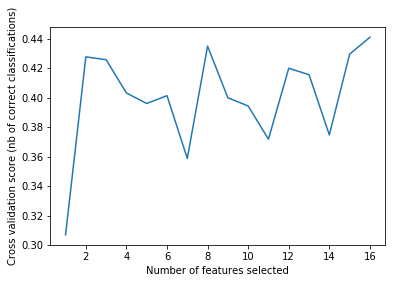

In [36]:
# Create the RFE object and compute a cross-validated score.
model = tree.DecisionTreeClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_rl, y_rl)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

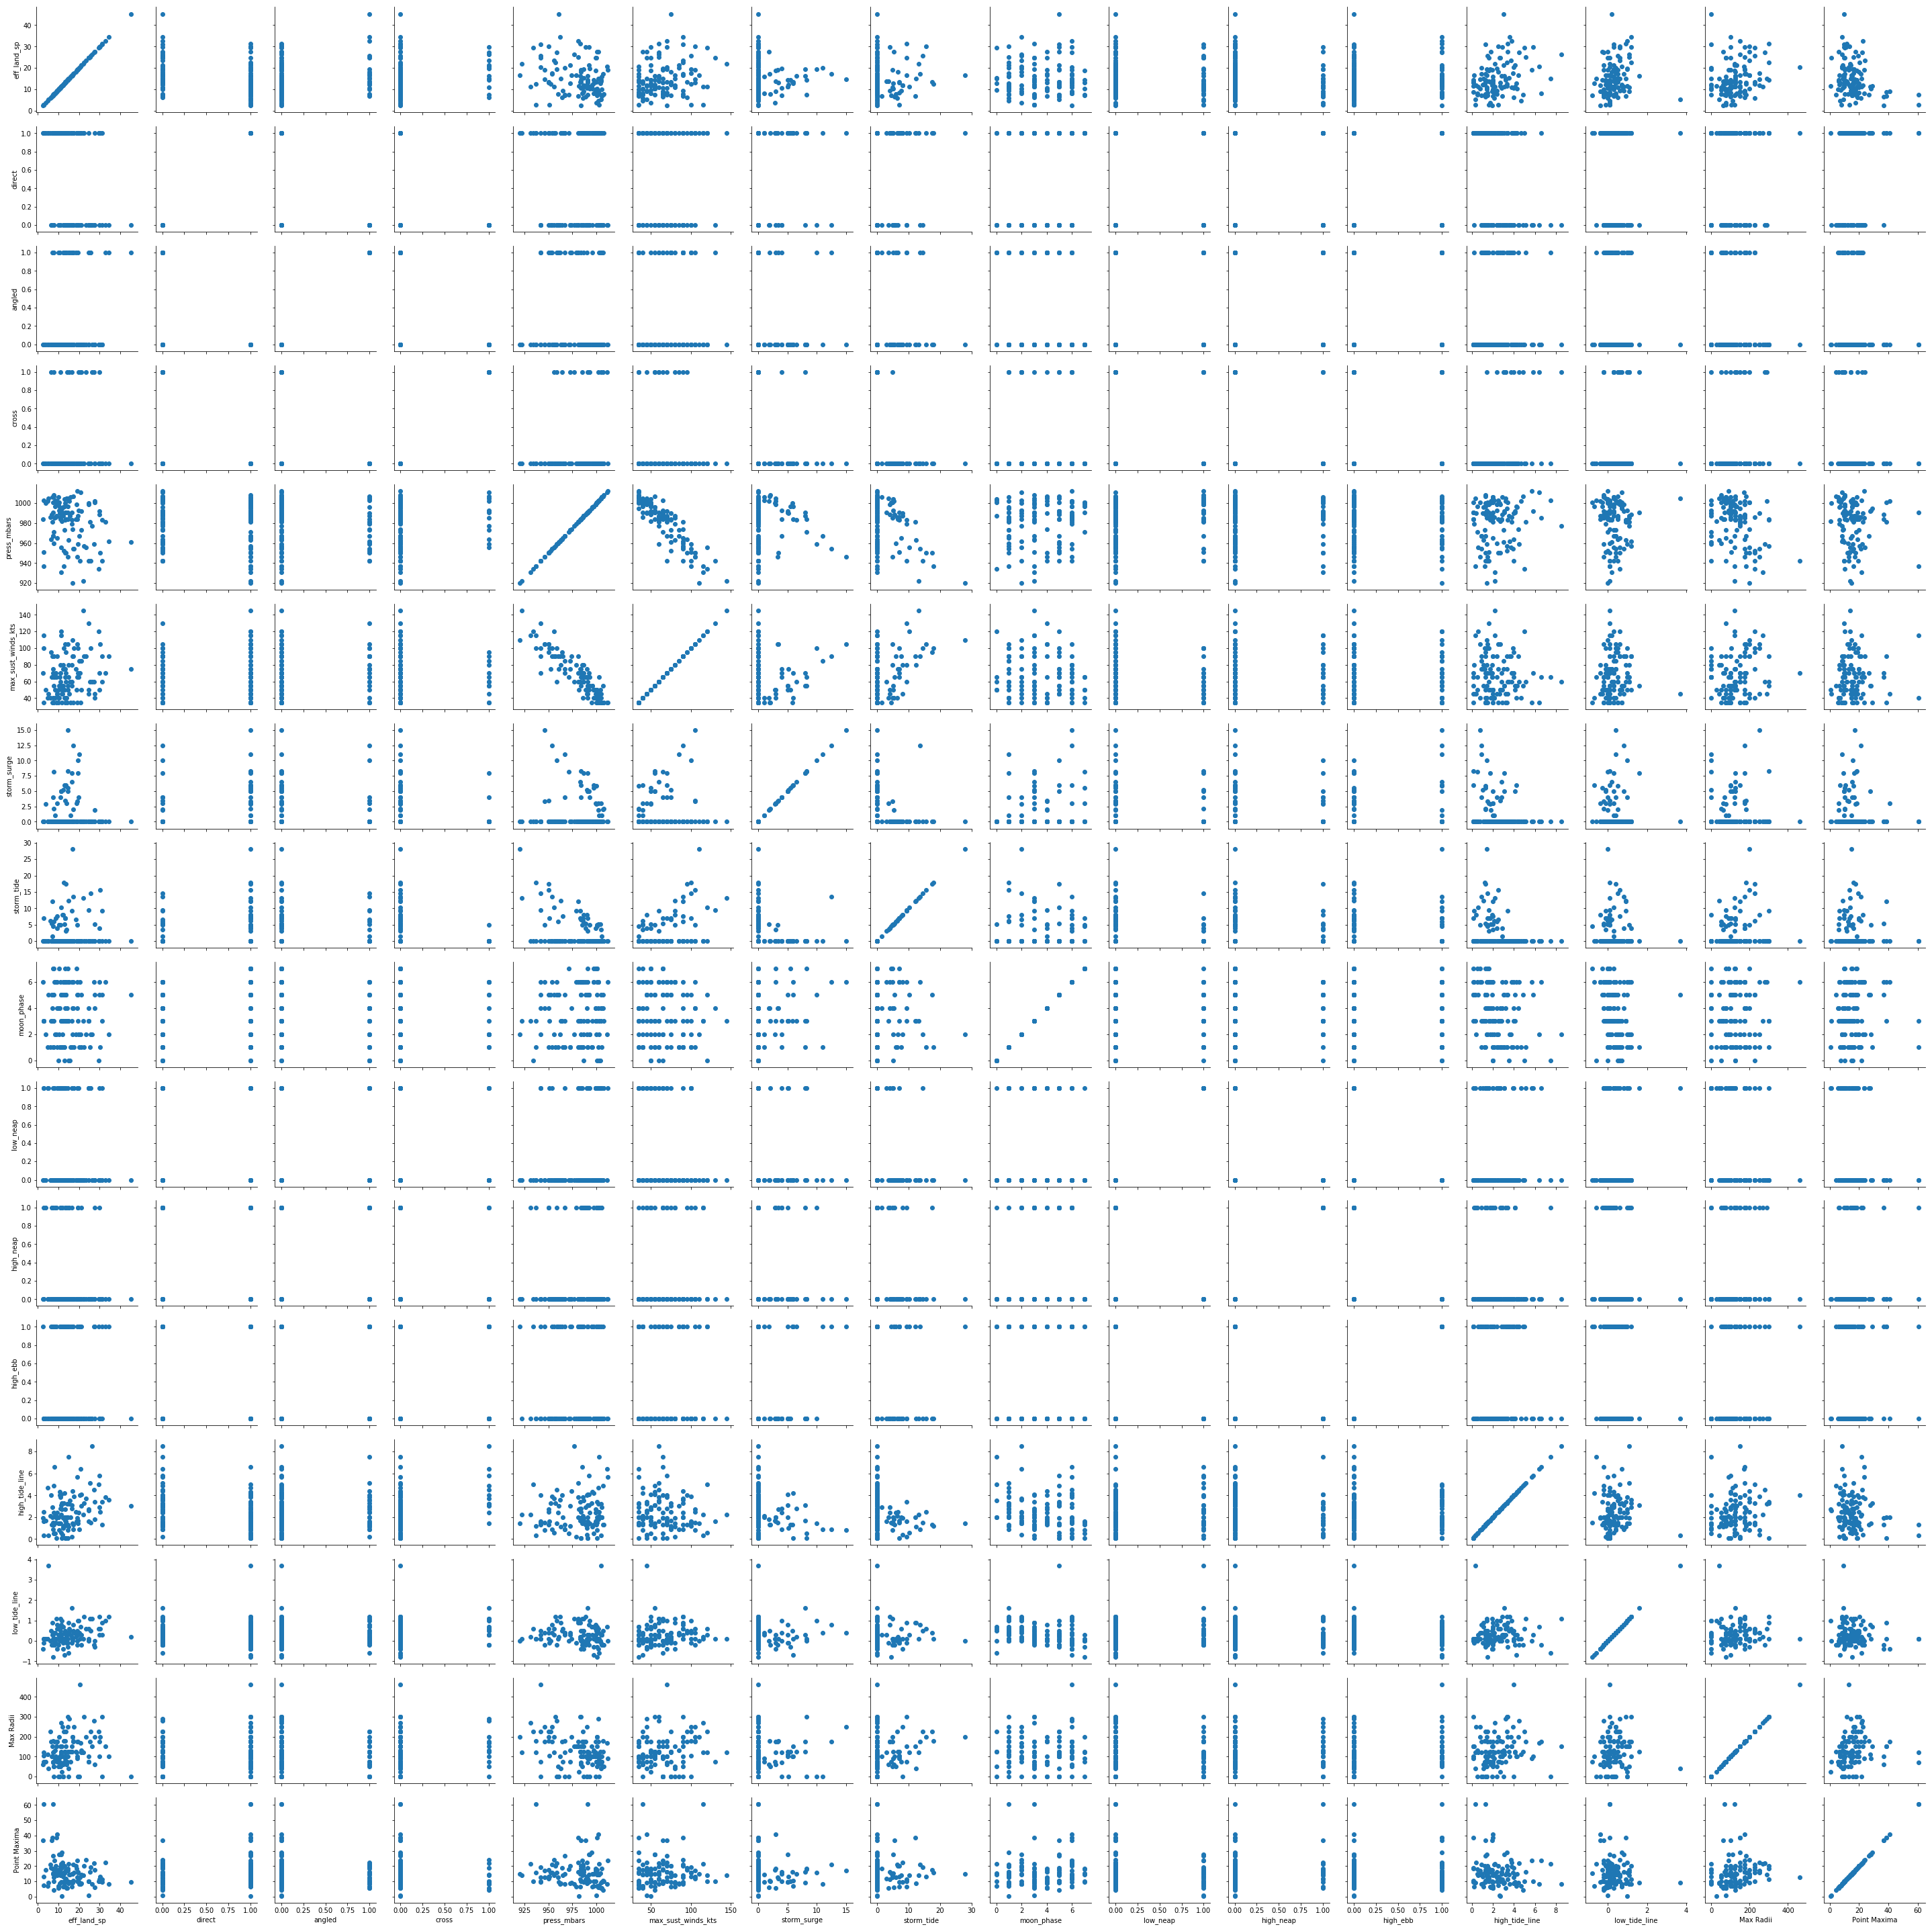

In [37]:
g = sns.PairGrid(X_rl[X_rl.columns[rfecv.support_]])
g.map(plt.scatter);

In [38]:
# Dropping columns which are not selected in our RFE Test.
X_rl = X_rl[X_rl.columns[rfecv.support_]]
X_rl = X_rl.astype("float64")

In [39]:
X_rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 16 columns):
eff_land_sp           115 non-null float64
direct                115 non-null float64
angled                115 non-null float64
cross                 115 non-null float64
press_mbars           115 non-null float64
max_sust_winds_kts    115 non-null float64
storm_surge           115 non-null float64
storm_tide            115 non-null float64
moon_phase            115 non-null float64
low_neap              115 non-null float64
high_neap             115 non-null float64
high_ebb              115 non-null float64
high_tide_line        115 non-null float64
low_tide_line         115 non-null float64
Max Radii             115 non-null float64
Point Maxima          115 non-null float64
dtypes: float64(16)
memory usage: 14.5 KB


In [40]:
# calculate the correlation matrix
corr = X_rl.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\

,eff_land_sp,direct,angled,cross,press_mbars,max_sust_winds_kts,storm_surge,storm_tide,moon_phase,low_neap,high_neap,high_ebb,high_tide_line,low_tide_line,Max Radii,Point Maxima
eff_land_sp,1,-0.33,0.18,0.15,-0.26,0.22,-0.018,0.046,-0.014,-0.061,-0.12,0.034,0.32,0.18,0.17,-0.3
direct,-0.33,1,-0.68,-0.46,-0.009,-0.047,0.088,0.11,0.047,-0.022,-0.063,0.032,-0.31,-0.084,0.12,0.2
angled,0.18,-0.68,1,-0.19,-0.091,0.13,-0.014,0.0099,-0.1,-0.053,0.11,-0.047,0.059,0.015,-0.11,-0.12
cross,0.15,-0.46,-0.19,1,0.081,-0.039,-0.067,-0.17,-0.014,-0.011,-0.041,0.048,0.39,0.18,0.074,-0.14
press_mbars,-0.26,-0.009,-0.091,0.081,1,-0.9,-0.051,-0.45,0.1,0.19,0.023,-0.056,0.1,-0.041,-0.33,-0.1
max_sust_winds_kts,0.22,-0.047,0.13,-0.039,-0.9,1,0.054,0.44,-0.1,-0.19,0.031,0.041,-0.09,0.053,0.17,0.059
storm_surge,-0.018,0.088,-0.014,-0.067,-0.051,0.054,1,-0.15,0.12,-0.06,0.047,0.1,-0.25,0.016,-0.056,-0.056
storm_tide,0.046,0.11,0.0099,-0.17,-0.45,0.44,-0.15,1,-0.02,-0.15,-0.034,0.04,-0.29,-0.041,0.15,0.0033
moon_phase,-0.014,0.047,-0.1,-0.014,0.1,-0.1,0.12,-0.02,1,-0.031,0.072,0.075,-0.23,-0.21,0.043,0.032
low_neap,-0.061,-0.022,-0.053,-0.011,0.19,-0.19,-0.06,-0.15,-0.031,1,-0.28,-0.39,0.075,0.14,-0.14,-0.15



----------


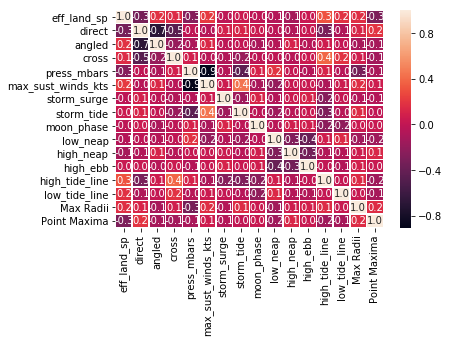

In [41]:
# correlation map
print("\n----------")
f,ax = plt.subplots()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)